**Author:** Lisa Wallner  
**Description:**  In this notebook the evaluation results of the first 50 README files which are generated with the llm *jamba-1.5-mini* and *llama3.1-8b* and a modified prompts are analysed. Keep in mind, the evaluation scores of the orignal README are the same like in df_score_lama because it make no sense the evaluate the same file twice.
 

*Hint: If lines are created with support of a Large Language Model or the code is taken from another source, you find following hint at the end of the line: (generated with Microsoft Copilot) or (source: link_to_source)*

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import seaborn as sns
import numpy as np

### Universal Functions

In [2]:
def exclude_repos(df):
    '''
    During the process there are some repositories found which can not be used because of inconsistence in the data. These repository data will be filterd out.  
        - diego-vicente: som-tsp --> GitHub repository has no README file
        - Taniiishk: Rock-Paper-Scissors-Game --> GitHub repository has no license
    '''
    repos_exclude = [('diego-vicente', 'som-tsp'), ('Taniiishk', 'Rock-Paper-Scissors-Game')]
    df = df[~df.set_index(['repo_owner', 'repo_name']).index.isin(repos_exclude)] 

    return df

In [3]:
def remove_cols(df):
    df = df.drop([
        'readme_g_score', 
        'readme_g_score_q1_txt', 
        'readme_g_score_q2_txt', 
        'readme_g_score_q3_txt', 
        'readme_g_score_q4_txt', 
        'readme_g_score_q5_txt', 
        'readme_o_score', 
        'readme_o_score_q1',
        'readme_o_score_q1_txt', 
        'readme_o_score_q2',
        'readme_o_score_q2_txt', 
        'readme_o_score_q3',
        'readme_o_score_q3_txt',
        'readme_o_score_q4', 
        'readme_o_score_q4_txt', 
        'readme_o_score_q5',
        'readme_o_score_q5_txt'], axis=1)

    return df

In [4]:
def load_data(path):
    with open(path, 'r') as f:
        loaded_data = json.load(f)

    df = pd.DataFrame(data=loaded_data)

    return df

In [5]:
def change_order(df, df_order):
    df = df.set_index('id').reindex(df_order['id']).reset_index()
    df = df[df.index < 50]

    return df

In [6]:
def add_id_col(df):
    df['id'] = df['repo_owner'] + '_' + df['repo_name']

    return df

In [7]:
def add_o_score(df, model_type):
    df_o = load_data(path='../data/evaluation_results/df_llama.json') # json with scores for original README --> use this for further comparisions
    df_o = df_o[['id', 'repo_owner', 'model_type', 'repo_name', 'total_score_o', 'score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']]
    df_o = df_o[df_o['model_type'] == model_type]
    df = df.merge(df_o[['id', 'model_type', 'total_score_o', 'score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']], on='id', how='left')

    return df
    

# Dataframe df_jamba    
This dataframe gives an overview of the evaluation results from the original and genearted READMES (generated by jamba-1.5-mini). The scoring was created with three different kind of llms - llama3.1-8b, reka-flash & jamba-1.5-mini.

### Order of GitHub repositories

In [8]:
order_data = load_data(path='../data/df_repos_counts_filtered.json') # load json with filtered repository
df_order = pd.DataFrame(order_data) 

In [9]:
df_order = exclude_repos(df_order)
df_order = add_id_col(df_order)

In [10]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 200
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   repo_owner                    199 non-null    object
 1   repo_name                     199 non-null    object
 2   source_code_comments          199 non-null    int64 
 3   source_code                   199 non-null    int64 
 4   source_code_cleaned_comments  199 non-null    int64 
 5   source_code_cleaned           199 non-null    int64 
 6   comments                      199 non-null    int64 
 7   formatting                    199 non-null    int64 
 8   sum                           199 non-null    int64 
 9   id                            199 non-null    object
dtypes: int64(7), object(3)
memory usage: 17.1+ KB


## Model 1

In [11]:
model = 'model1'
path = f'../data/df_score_lama_mod/df_score_{model}_manuel.json'
df_1 = load_data(path)

In [12]:
len(df_1)

52

In [13]:
df_1 = exclude_repos(df_1)
df_1 = add_id_col(df_1)


In [14]:
len(df_1)

50

In [15]:
df_1 = change_order(df_1, df_order)
df_1 = remove_cols(df_1)
df_1 = add_o_score(df_1, model_type='llama3.1-8b')

In [16]:
len(df_1)

50

In [17]:
df_1.head(4)

,id,repo_owner,repo_name,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,model_type,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
0,openstack_openstack,openstack,openstack,5.0,4.0,5.0,2.0,2.0,llama3.1-8b,20,4,5,2,5,4
1,majumderb_rezero,majumderb,rezero,5.0,5.0,5.0,2.0,2.0,llama3.1-8b,21,5,5,4,2,5
2,andkret_Cookbook,andkret,Cookbook,4.0,4.0,3.0,2.0,2.0,llama3.1-8b,24,5,5,4,5,5
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,4.0,5.0,4.0,2.0,2.0,llama3.1-8b,19,5,4,3,2,5


In [18]:
df_1.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.700000,4.460000,4.460000,2.000000,2.360000,21.000000,4.460000,4.640000,4.460000,3.560000,3.880000
std,0.505076,0.676425,0.613122,0.349927,1.102132,3.763411,0.994064,0.721676,0.676425,1.342553,1.573246
min,3.000000,2.000000,3.000000,1.000000,1.000000,11.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,2.000000,2.000000,19.000000,4.000000,5.000000,4.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,2.000000,2.000000,23.000000,5.000000,5.000000,5.000000,4.000000,5.000000
75%,5.000000,5.000000,5.000000,2.000000,2.000000,24.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,4.000000,5.000000,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Model 2

In [19]:
model = 'model2'
path = f'../data/df_score_lama_mod/df_score_{model}_manuel.json'
df_2 = load_data(path)

In [20]:
len(df_2)

52

In [21]:
df_2 = exclude_repos(df_2)
df_2 = add_id_col(df_2)
df_2 = change_order(df_2, df_order)

In [22]:
len(df_2)

50

In [23]:
df_2 = remove_cols(df_2)
df_2 = add_o_score(df_2, model_type='reka-flash')

In [24]:
df_2.head(5)

,id,repo_owner,repo_name,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,model_type,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
0,openstack_openstack,openstack,openstack,4.0,3.0,5.0,2.0,3.0,reka-flash,20,4,3,4,5,4
1,majumderb_rezero,majumderb,rezero,5.0,4.0,5.0,3.0,4.0,reka-flash,24,5,5,5,4,5
2,andkret_Cookbook,andkret,Cookbook,5.0,4.0,5.0,3.0,3.0,reka-flash,20,4,5,4,4,3
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,4.0,3.0,4.0,2.0,3.0,reka-flash,17,4,4,3,3,3
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,5.0,5.0,5.0,3.0,3.0,reka-flash,18,4,4,5,2,3


In [25]:
df_2.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.760000,3.760000,4.920000,2.720000,3.600000,20.900000,4.540000,4.340000,4.660000,3.460000,3.900000
std,0.431419,0.517451,0.274048,0.496518,0.534522,3.137983,0.734291,0.823383,0.658074,0.930438,0.931315
min,4.000000,2.000000,4.000000,2.000000,3.000000,12.000000,2.000000,2.000000,2.000000,1.000000,2.000000
25%,5.000000,4.000000,5.000000,2.000000,3.000000,19.250000,4.000000,4.000000,4.250000,3.000000,3.000000
50%,5.000000,4.000000,5.000000,3.000000,4.000000,22.000000,5.000000,5.000000,5.000000,4.000000,4.000000
75%,5.000000,4.000000,5.000000,3.000000,4.000000,23.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,4.000000,5.000000,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Model 3

In [26]:
model = 'model3'
path = f'../data/df_score_lama_mod/df_score_{model}_manuel.json'
df_3 = load_data(path)

In [27]:
len(df_3)

52

In [28]:
df_3 = exclude_repos(df_3)
df_3 = add_id_col(df_3)
df_3 = change_order(df_3, df_order)

In [29]:
len(df_3)

50

In [30]:
df_3 = remove_cols(df_3)
df_3 = add_o_score(df_3, model_type='jamba-1.5-mini')

In [31]:
df_3.head(5)

,id,repo_owner,repo_name,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,model_type,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
0,openstack_openstack,openstack,openstack,5.0,5.0,5.0,5.0,5.0,jamba-1.5-mini,18,4,4,3,3,4
1,majumderb_rezero,majumderb,rezero,5.0,5.0,5.0,5.0,5.0,jamba-1.5-mini,25,5,5,5,5,5
2,andkret_Cookbook,andkret,Cookbook,5.0,5.0,4.0,3.0,5.0,jamba-1.5-mini,20,5,5,4,3,3
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,5.0,5.0,4.0,3.0,3.0,jamba-1.5-mini,25,5,5,5,5,5
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,5.0,5.0,5.0,5.0,5.0,jamba-1.5-mini,17,4,5,3,2,3


In [32]:
df_3.describe()

,readme_g_score_q1,readme_g_score_q2,readme_g_score_q3,readme_g_score_q4,readme_g_score_q5,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.940000,4.940000,4.460000,3.860000,4.540000,22.300000,4.860000,4.760000,4.460000,3.900000,4.320000
std,0.239898,0.239898,0.613122,1.088155,0.813408,3.092123,0.404566,0.555492,0.676425,1.092647,0.935469
min,4.000000,4.000000,3.000000,2.000000,3.000000,14.000000,3.000000,3.000000,3.000000,2.000000,2.000000
25%,5.000000,5.000000,4.000000,3.000000,4.250000,20.000000,5.000000,5.000000,4.000000,3.000000,3.000000
50%,5.000000,5.000000,5.000000,3.000000,5.000000,24.000000,5.000000,5.000000,5.000000,4.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Final Dataframe - df_llama_mod

Create Dataframe for the scoring data of 50 GitHub repositories and the three evaluation models lama3.1-8b, reka-flash and jamba-1.5-mini.

In [33]:
cols = ['id','repo_owner', 'repo_name', 'model_type', 'total_score_g', 'score_q1_g', 'score_q2_g', 'score_q3_g', 'score_q4_g', 'score_q5_g', 'total_score_o', 'score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']
df_llama_mod = pd.DataFrame(columns=cols)

In [34]:
dfs = [df_1, df_2, df_3]
model_types = ['llama3.1-8b', 'reka-flash', 'jamba-1.5-mini']

In [35]:
for idx, df in enumerate(dfs):
    model_type = model_types[idx]
    
    for _,row in df.iterrows():
        new_row = {
            'id': row['id'],
            'repo_owner': row['repo_owner'], 
            'repo_name': row['repo_name'], 
            'model_type': model_type, 
            'total_score_g': np.nan, 
            'score_q1_g': row['readme_g_score_q1'], 
            'score_q2_g': row['readme_g_score_q2'], 
            'score_q3_g': row['readme_g_score_q3'], 
            'score_q4_g': row['readme_g_score_q4'], 
            'score_q5_g': row['readme_g_score_q5'], 
            'total_score_o': np.nan, 
            'score_q1_o': row['score_q1_o'], 
            'score_q2_o': row['score_q2_o'], 
            'score_q3_o': row['score_q3_o'], 
            'score_q4_o': row['score_q4_o'], 
            'score_q5_o': row['score_q5_o']
    }
        df_llama_mod = pd.concat([df_llama_mod, pd.DataFrame([new_row])], ignore_index=True)

/tmp/ipykernel_1884/3698325022.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_llama_mod = pd.concat([df_llama_mod, pd.DataFrame([new_row])], ignore_index=True)


Calculate the total score for the genearted and orginal README's.

In [36]:
df_llama_mod['total_score_g'] = df_llama_mod[['score_q1_g', 'score_q2_g', 'score_q3_g', 'score_q4_g', 'score_q5_g']].sum(axis=1).astype(int)
df_llama_mod['total_score_o'] = df_llama_mod[['score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o']].sum(axis=1).astype(int)

In [37]:
df_llama_mod

,id,repo_owner,repo_name,model_type,total_score_g,score_q1_g,score_q2_g,score_q3_g,score_q4_g,score_q5_g,total_score_o,score_q1_o,score_q2_o,score_q3_o,score_q4_o,score_q5_o
0,openstack_openstack,openstack,openstack,llama3.1-8b,18,5.0,4.0,5.0,2.0,2.0,20,4,5,2,5,4
1,majumderb_rezero,majumderb,rezero,llama3.1-8b,19,5.0,5.0,5.0,2.0,2.0,21,5,5,4,2,5
2,andkret_Cookbook,andkret,Cookbook,llama3.1-8b,15,4.0,4.0,3.0,2.0,2.0,24,5,5,4,5,5
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,llama3.1-8b,17,4.0,5.0,4.0,2.0,2.0,19,5,4,3,2,5
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,llama3.1-8b,18,5.0,5.0,4.0,2.0,2.0,20,4,5,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,postmanlabs_httpbin,postmanlabs,httpbin,jamba-1.5-mini,16,4.0,4.0,3.0,2.0,3.0,17,4,5,3,2,3
146,huggingface_alignment-handbook,huggingface,alignment-handbook,jamba-1.5-mini,22,5.0,5.0,4.0,3.0,5.0,22,5,5,4,3,5
147,YaoFANGUK_video-subtitle-extractor,YaoFANGUK,video-subtitle-extractor,jamba-1.5-mini,20,5.0,5.0,4.0,3.0,3.0,24,5,5,4,5,5
148,maralla_completor.vim,maralla,completor.vim,jamba-1.5-mini,21,5.0,5.0,5.0,3.0,3.0,20,5,5,4,3,3


In [38]:
df_llama_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    object 
 1   repo_owner     150 non-null    object 
 2   repo_name      150 non-null    object 
 3   model_type     150 non-null    object 
 4   total_score_g  150 non-null    int64  
 5   score_q1_g     150 non-null    float64
 6   score_q2_g     150 non-null    float64
 7   score_q3_g     150 non-null    float64
 8   score_q4_g     150 non-null    float64
 9   score_q5_g     150 non-null    float64
 10  total_score_o  150 non-null    int64  
 11  score_q1_o     150 non-null    object 
 12  score_q2_o     150 non-null    object 
 13  score_q3_o     150 non-null    object 
 14  score_q4_o     150 non-null    object 
 15  score_q5_o     150 non-null    object 
dtypes: float64(5), int64(2), object(9)
memory usage: 18.9+ KB


### Llama3.1-8b

In [39]:
df_eval_llama = df_llama_mod[['id', 'model_type', 'total_score_g', 'total_score_o']]
df_eval_llama = df_eval_llama[df_eval_llama['model_type'] == 'llama3.1-8b']
df_eval_llama = df_eval_llama.reset_index(drop=True)
df_eval_llama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             50 non-null     object
 1   model_type     50 non-null     object
 2   total_score_g  50 non-null     int64 
 3   total_score_o  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [40]:
df_eval_llama.describe()

,total_score_g,total_score_o
count,50.000000,50.000000
mean,17.980000,21.000000
std,1.671978,3.763411
min,15.000000,11.000000
25%,17.000000,19.000000
50%,18.000000,23.000000
75%,18.750000,24.000000
max,23.000000,25.000000


**Generated README's**

In [41]:
df_eval_llama.loc[df_eval_llama['total_score_g'].idxmin()]

id               andkret_Cookbook
model_type            llama3.1-8b
total_score_g                  15
total_score_o                  24
Name: 2, dtype: object

In [42]:
df_eval_llama.loc[df_eval_llama['total_score_g'].idxmax()]

id               tatsu-lab_stanford_alpaca
model_type                     llama3.1-8b
total_score_g                           23
total_score_o                           23
Name: 17, dtype: object

### Reka Flash

In [43]:
df_eval_reka = df_llama_mod[['id', 'model_type', 'total_score_g', 'total_score_o']]
df_eval_reka = df_eval_reka[df_eval_reka['model_type'] == 'reka-flash']
df_eval_reka = df_eval_reka.reset_index(drop=True)
df_eval_reka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             50 non-null     object
 1   model_type     50 non-null     object
 2   total_score_g  50 non-null     int64 
 3   total_score_o  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [44]:
df_eval_reka.describe()

,total_score_g,total_score_o
count,50.000000,50.000000
mean,19.760000,20.900000
std,1.824549,3.137983
min,16.000000,12.000000
25%,19.000000,19.250000
50%,21.000000,22.000000
75%,21.000000,23.000000
max,23.000000,25.000000


**Generated README's**

In [45]:
df_eval_reka.loc[df_eval_reka['total_score_g'].idxmin()]

id               lennylxx_ipv6-hosts
model_type                reka-flash
total_score_g                     16
total_score_o                     17
Name: 3, dtype: object

In [46]:
df_eval_reka.loc[df_eval_reka['total_score_g'].idxmax()]

id               tatsu-lab_stanford_alpaca
model_type                      reka-flash
total_score_g                           23
total_score_o                           23
Name: 17, dtype: object

### Jamba-1.5 Mini

In [47]:
df_eval_jamba = df_llama_mod[['id', 'model_type', 'total_score_g', 'total_score_o']]
df_eval_jamba = df_eval_jamba[df_eval_jamba['model_type'] == 'jamba-1.5-mini']
df_eval_jamba = df_eval_jamba.reset_index(drop=True)
df_eval_jamba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             50 non-null     object
 1   model_type     50 non-null     object
 2   total_score_g  50 non-null     int64 
 3   total_score_o  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [48]:
df_eval_jamba.describe()

,total_score_g,total_score_o
count,50.000000,50.000000
mean,22.740000,22.300000
std,2.537957,3.092123
min,16.000000,14.000000
25%,22.000000,20.000000
50%,22.000000,24.000000
75%,25.000000,25.000000
max,25.000000,25.000000


**Generated README's**

In [49]:
df_eval_jamba.loc[df_eval_jamba['total_score_g'].idxmin()]

id               mcdallas_wallstreet
model_type            jamba-1.5-mini
total_score_g                     16
total_score_o                     25
Name: 14, dtype: object

In [50]:
df_eval_jamba.loc[df_eval_jamba['total_score_g'].idxmax()]

id               openstack_openstack
model_type            jamba-1.5-mini
total_score_g                     25
total_score_o                     18
Name: 0, dtype: object

### Plot total scores of all three evaluation models

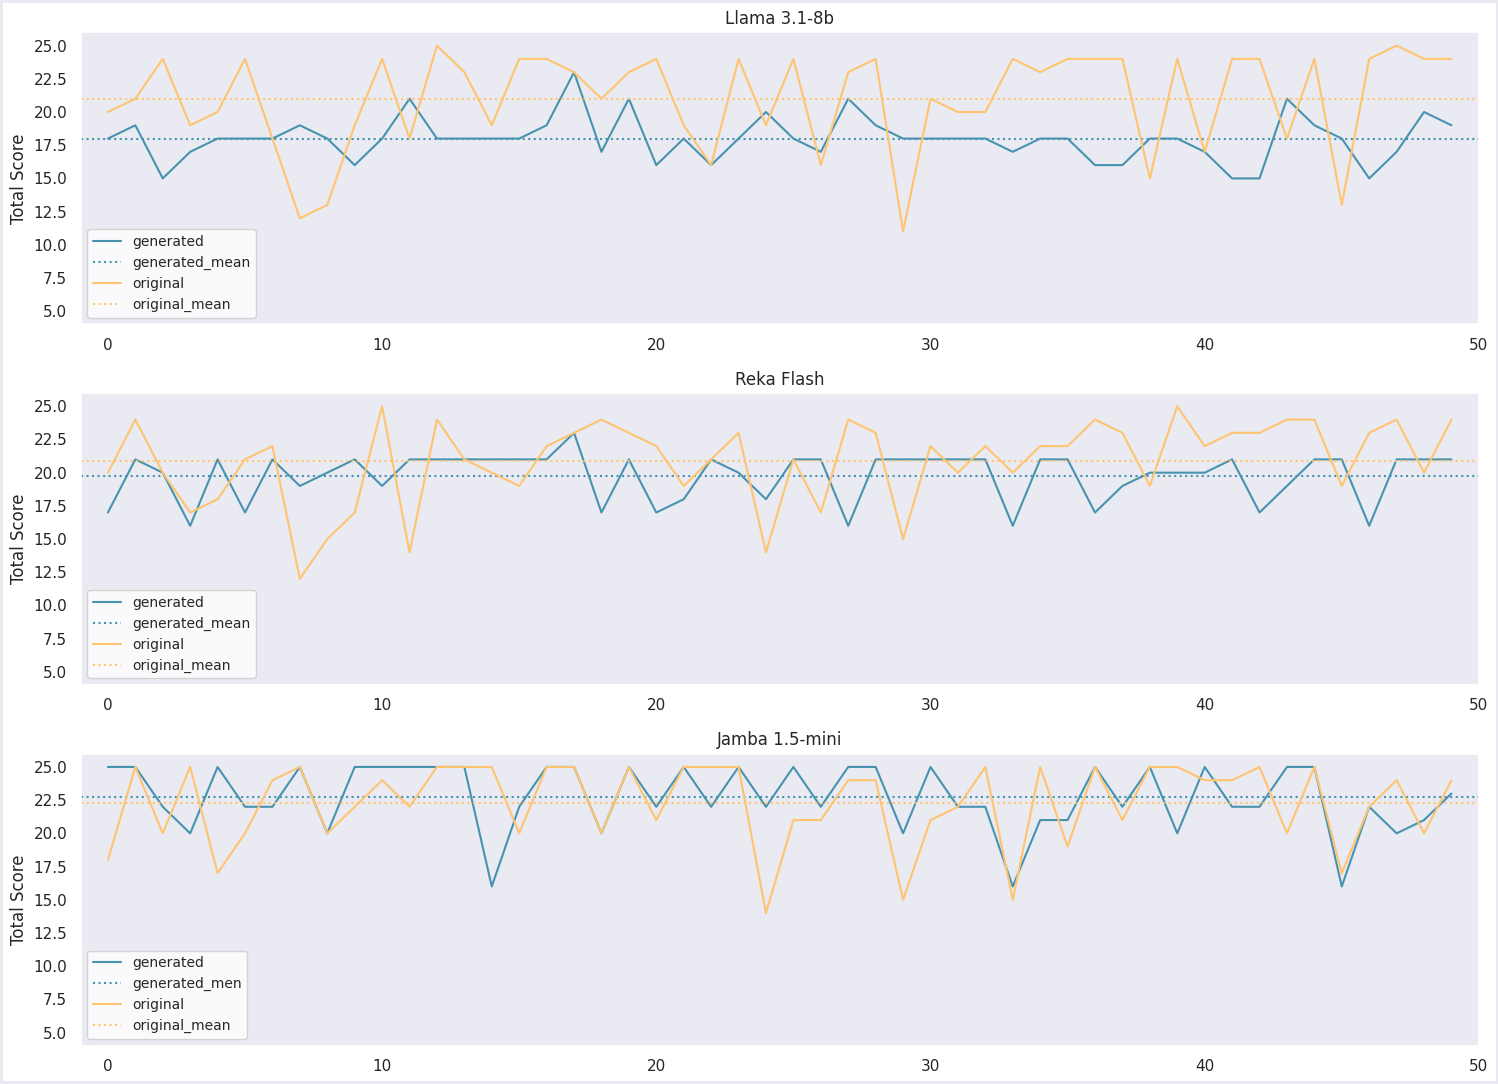

In [51]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(15, 11)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # llama
    l_score_g = df_eval_llama['total_score_g']
    l_score_g_mean = df_eval_llama['total_score_g'].mean()
    l_score_o = df_eval_llama['total_score_o']
    l_score_o_mean = df_eval_llama['total_score_o'].mean()

    # reka
    r_score_g = df_eval_reka['total_score_g']
    r_score_g_mean = df_eval_reka['total_score_g'].mean()
    r_score_o = df_eval_reka['total_score_o']
    r_score_o_mean = df_eval_reka['total_score_o'].mean()

    # jamba
    j_score_g = df_eval_jamba['total_score_g']
    j_score_g_mean = df_eval_jamba['total_score_g'].mean()
    j_score_o = df_eval_jamba['total_score_o']
    j_score_o_mean = df_eval_jamba['total_score_o'].mean()

    ax[0].plot(l_score_g, label='generated', color='#4793AF')
    ax[0].axhline(l_score_g_mean, label='generated_mean', color='#4793AF', linestyle=':')
    ax[0].plot(l_score_o, label='original', color='#FFC470')
    ax[0].axhline(l_score_o_mean, label='original_mean', color='#FFC470', linestyle=':')
    ax[0].set_title('Llama 3.1-8b')
    ax[0].legend(loc=3, fontsize=10, facecolor='white')
    ax[0].set_xlim(-1,50)
    ax[0].set_ylabel('Total Score')
    ax[0].set_ylim(4,26)

    ax[1].plot(r_score_g, label='generated', color='#4793AF')
    ax[1].axhline(r_score_g_mean, label='generated_mean', color='#4793AF', linestyle=':')
    ax[1].plot(r_score_o, label='original', color='#FFC470')
    ax[1].axhline(r_score_o_mean, label='original_mean', color='#FFC470', linestyle=':')
    ax[1].set_title('Reka Flash')
    ax[1].legend(loc=3, fontsize=10, facecolor='white')
    ax[1].set_xlim(-1,50)
    ax[1].set_ylabel('Total Score')
    ax[1].set_ylim(4,26)

    ax[2].plot(j_score_g, label='generated', color='#4793AF')
    ax[2].axhline(j_score_g_mean, label='generated_men', color='#4793AF', linestyle=':')
    ax[2].plot(j_score_o, label='original', color='#FFC470')
    ax[2].axhline(j_score_o_mean, label='original_mean', color='#FFC470', linestyle=':')
    ax[2].set_title('Jamba 1.5-mini')
    ax[2].legend(loc=3, fontsize=10, facecolor='white')
    ax[2].set_xlim(-1,50)
    ax[2].set_ylabel('Total Score')
    ax[2].set_ylim(4,26)

    plt.grid(visible=False) # turn of grid
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

<u>Jamba 1.5-mini</u>  
The mean score of genearted README's is a little bit higher than of the orginal README's. The llm *jamba-1.5-mini* ranks the mean of its own generated README files higher then the original one. The other llm's rate the generated files with a lower value.

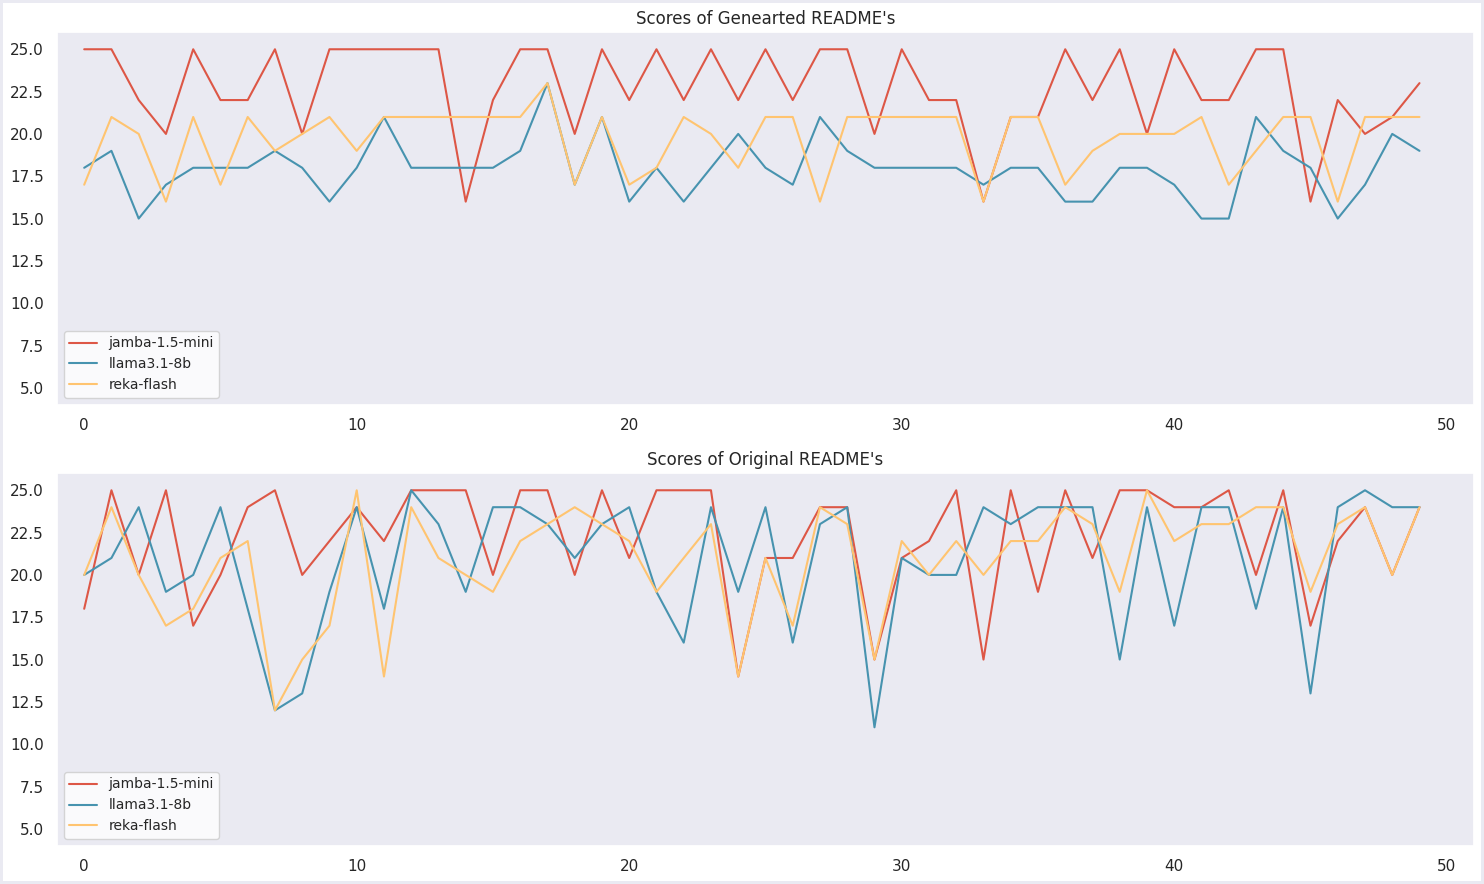

In [52]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 9)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # llama
    l_score_g = df_eval_llama['total_score_g']
    l_score_o = df_eval_llama['total_score_o']

    # reka
    r_score_g = df_eval_reka['total_score_g']
    r_score_o = df_eval_reka['total_score_o']

    # jamba
    j_score_g = df_eval_jamba['total_score_g']
    j_score_o = df_eval_jamba['total_score_o']

    ax[0].plot(j_score_g, label='jamba-1.5-mini', color='#DD5746')
    ax[0].plot(l_score_g, label='llama3.1-8b', color='#4793AF')
    ax[0].plot(r_score_g, label='reka-flash', color='#FFC470')
    
    ax[0].set_title("Scores of Genearted README's")
    ax[0].legend(loc=3, fontsize=10, facecolor='white')
    ax[0].set_xlim(-1,51)
    ax[0].set_ylim(4,26)

    ax[1].plot(j_score_o, label='jamba-1.5-mini', color='#DD5746')
    ax[1].plot(l_score_o, label='llama3.1-8b', color='#4793AF')
    ax[1].plot(r_score_o, label='reka-flash', color='#FFC470')
    
    ax[1].set_title("Scores of Original README's")
    ax[1].legend(loc=3, fontsize=10, facecolor='white')
    ax[1].set_xlim(-1,51)
    ax[1].set_ylim(4,26)

    plt.grid(visible=False) # turn of grid
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

## Dataframe df_lamba_mod_com  
This dataframe contains the compressed results from df_jamba restricted on the total scores.

In [53]:
df_llama_mod_tmp = df_llama_mod[['id','repo_owner', 'repo_name', 'total_score_g', 'total_score_o', 'model_type']]

In [54]:
df_llama_mod_tmp # df with all model_types --> 3x50 rows

,id,repo_owner,repo_name,total_score_g,total_score_o,model_type
0,openstack_openstack,openstack,openstack,18,20,llama3.1-8b
1,majumderb_rezero,majumderb,rezero,19,21,llama3.1-8b
2,andkret_Cookbook,andkret,Cookbook,15,24,llama3.1-8b
3,lennylxx_ipv6-hosts,lennylxx,ipv6-hosts,17,19,llama3.1-8b
4,awslabs_aws-config-to-elasticsearch,awslabs,aws-config-to-elasticsearch,18,20,llama3.1-8b
...,...,...,...,...,...,...
145,postmanlabs_httpbin,postmanlabs,httpbin,16,17,jamba-1.5-mini
146,huggingface_alignment-handbook,huggingface,alignment-handbook,22,22,jamba-1.5-mini
147,YaoFANGUK_video-subtitle-extractor,YaoFANGUK,video-subtitle-extractor,20,24,jamba-1.5-mini
148,maralla_completor.vim,maralla,completor.vim,21,20,jamba-1.5-mini


In [55]:
df_llama_mod_tmp[df_llama_mod_tmp['repo_owner'] == 'openstack']

,id,repo_owner,repo_name,total_score_g,total_score_o,model_type
0,openstack_openstack,openstack,openstack,18,20,llama3.1-8b
50,openstack_openstack,openstack,openstack,17,20,reka-flash
100,openstack_openstack,openstack,openstack,25,18,jamba-1.5-mini


Calculate mean of score values.

In [56]:
# rows are grouped by 'id'
# .reset_index() --> prepare index of current df for merging into another df
# .rename() --> customise name of column which holds the results of the aggregation
df_tmp_g = df_llama_mod_tmp.groupby('id')['total_score_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'total_score_g': 'score_g'})
df_tmp_o = df_llama_mod_tmp.groupby('id')['total_score_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'total_score_o': 'score_o'})

# merge df_tmp_o & df_tmp_g by key 'id' to df_llama_tmp
df_llama_mod_tmp = df_llama_mod_tmp.merge(df_tmp_g, on='id', how='left') \
                           .merge(df_tmp_o, on='id', how='left')

Remove duplicate rows  
Each GitHub repository occurs three times because it was evaluated by three different models. Now only the mean of the three total_score values are required, so duplicates can be deleted.

In [57]:
df_llama_mod_tmp = df_llama_mod_tmp[~df_llama_mod_tmp['model_type'].isin(['reka-flash', 'jamba-1.5-mini'])]

In [58]:
df_llama_mod_com = df_llama_mod_tmp[['id','repo_owner', 'repo_name', 'score_g', 'score_o']]

In [59]:
df_llama_mod_com[df_llama_mod_com['repo_owner'] == 'openstack']

,id,repo_owner,repo_name,score_g,score_o
0,openstack_openstack,openstack,openstack,20.0,19.333333


In [60]:
df_llama_mod_com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          50 non-null     object 
 1   repo_owner  50 non-null     object 
 2   repo_name   50 non-null     object 
 3   score_g     50 non-null     float64
 4   score_o     50 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.3+ KB


In [61]:
df_llama_mod_com.describe()

,score_g,score_o
count,50.000000,50.000000
mean,20.160000,21.400000
std,1.419399,2.660708
min,16.333333,13.666667
25%,19.333333,20.416667
50%,20.333333,21.666667
75%,21.250000,23.666667
max,23.666667,24.666667


### Visualize the mean (score of all three evaluation models) of all scores for the generated and the original README's

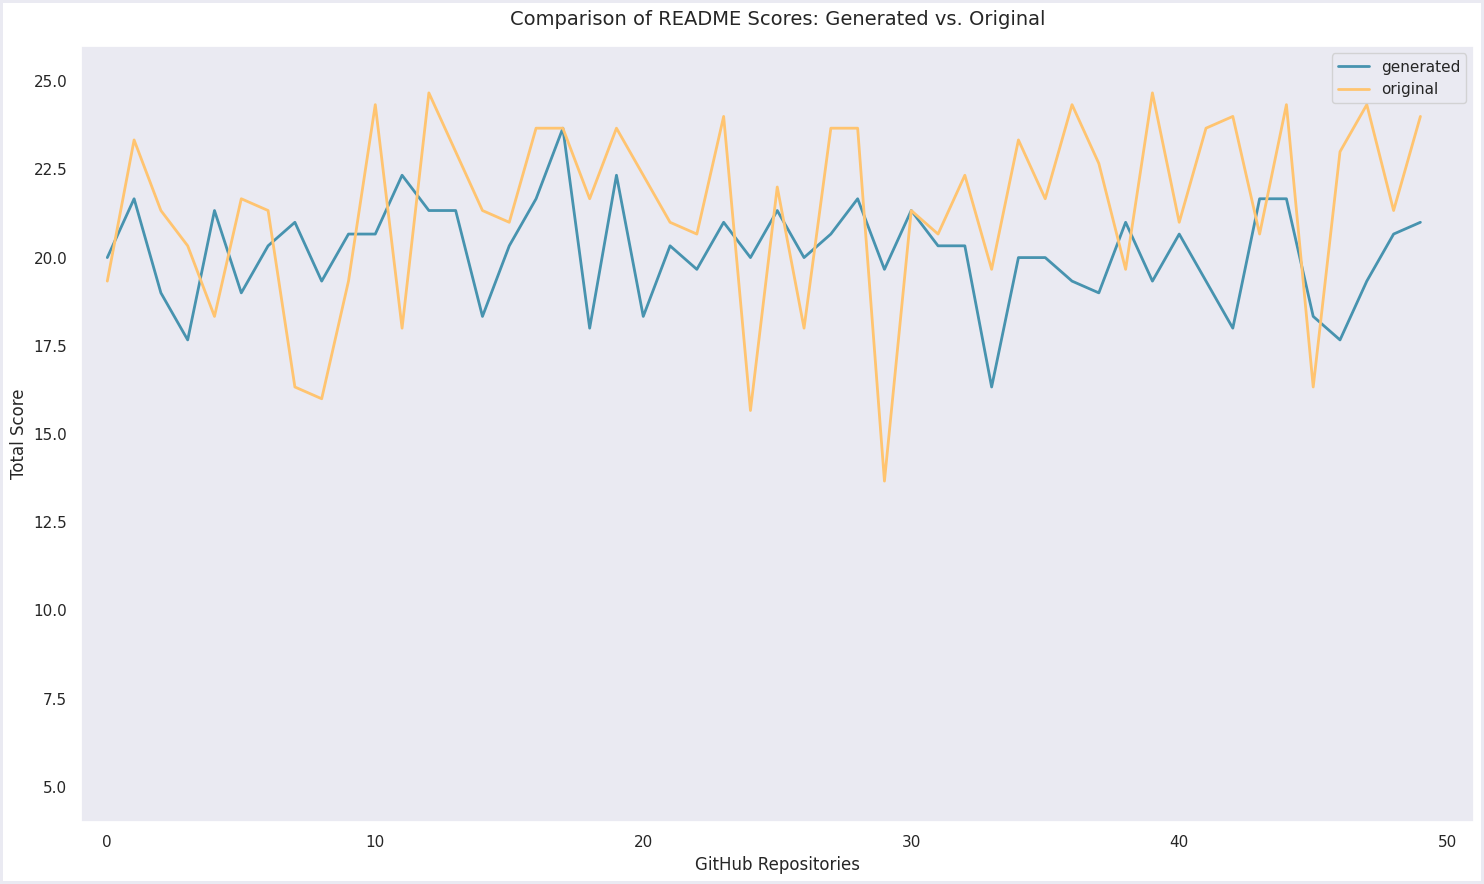

In [62]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # use sns style for axis
    sns.set_theme(style='dark') # set theme
    fig, ax = plt.subplots(figsize=(15, 9)) # define figure and primary axis
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    x_labels = df_llama_mod_com['id'] # ids of repositories
    x_numeric = np.arange(len(x_labels))  # numeric range with same length as x_labels (for trend numeric values are required)
    y_score_g = df_llama_mod_com['score_g'] # number of summaries for each repository
    y_score_o = df_llama_mod_com['score_o'] # total score of the genearted README's

    ax.plot(x_numeric, y_score_g, label='generated', color='#4793AF', linewidth=2)
    ax.plot(x_numeric, y_score_o, label='original', color='#FFC470', linewidth=2)
    ax.set_xlabel('GitHub Repository')
    ax.set_ylabel('Total Score')
    ax.tick_params(axis='y')

    ax.set_xlabel('GitHub Repositories') # set label for x-axis
    ax.set_xlim(-1,51)
    ax.set_ylim(4,26)

    plt.legend()
    plt.title("Comparison of README Scores: Generated vs. Original",fontsize=14, pad=15) # set title
    fig.tight_layout()
    plt.show() # show plot

sns.reset_defaults() # reset sns changes

### *Additional dataframe with the total score and the score by each single question*

In [63]:
df_llama_mod_tmp2= df_llama_mod.copy()

In [64]:
df_tmp2_g_1 = df_llama_mod_tmp2.groupby('id')['score_q1_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q1_g': 'score_q1_g_1'})
df_tmp2_g_2 = df_llama_mod_tmp2.groupby('id')['score_q2_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q2_g': 'score_q2_g_2'})
df_tmp2_g_3 = df_llama_mod_tmp2.groupby('id')['score_q3_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q3_g': 'score_q3_g_3'})
df_tmp2_g_4 = df_llama_mod_tmp2.groupby('id')['score_q4_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q4_g': 'score_q4_g_4'})
df_tmp2_g_5 = df_llama_mod_tmp2.groupby('id')['score_q5_g'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q5_g': 'score_q5_g_5'})

df_tmp2_o_1 = df_llama_mod_tmp2.groupby('id')['score_q1_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q1_o': 'score_q1_o_1'})
df_tmp2_o_2 = df_llama_mod_tmp2.groupby('id')['score_q2_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q2_o': 'score_q2_o_2'})
df_tmp2_o_3 = df_llama_mod_tmp2.groupby('id')['score_q3_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q3_o': 'score_q3_o_3'})
df_tmp2_o_4 = df_llama_mod_tmp2.groupby('id')['score_q4_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q4_o': 'score_q4_o_4'})
df_tmp2_o_5 = df_llama_mod_tmp2.groupby('id')['score_q5_o'].agg(lambda x: x.mean()).reset_index().rename(columns={'score_q5_o': 'score_q5_o_5'})

df_llama_mod_tmp2 = df_llama_mod_tmp2.merge(df_tmp2_g_1, on='id', how='left') \
                           .merge(df_tmp2_g_2, on='id', how='left') \
                           .merge(df_tmp2_g_3, on='id', how='left') \
                           .merge(df_tmp2_g_4, on='id', how='left') \
                           .merge(df_tmp2_g_5, on='id', how='left') \
                           .merge(df_tmp2_o_1, on='id', how='left') \
                           .merge(df_tmp2_o_2, on='id', how='left') \
                           .merge(df_tmp2_o_3, on='id', how='left') \
                           .merge(df_tmp2_o_4, on='id', how='left') \
                           .merge(df_tmp2_o_5, on='id', how='left') 

In [65]:
df_llama_mod_tmp2 = df_llama_mod_tmp2.drop(['score_q1_g', 'score_q2_g','score_q3_g','score_q4_g', 'score_q5_g','score_q1_o', 'score_q2_o', 'score_q3_o', 'score_q4_o', 'score_q5_o', 'total_score_g', 'total_score_o'], axis=1)

In [66]:
df_llama_mod_tmp2 = df_llama_mod_tmp2[~df_llama_mod_tmp2['model_type'].isin(['reka-flash', 'jamba-1.5-mini'])]

In [67]:
df_llama_mod_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            50 non-null     object 
 1   repo_owner    50 non-null     object 
 2   repo_name     50 non-null     object 
 3   model_type    50 non-null     object 
 4   score_q1_g_1  50 non-null     float64
 5   score_q2_g_2  50 non-null     float64
 6   score_q3_g_3  50 non-null     float64
 7   score_q4_g_4  50 non-null     float64
 8   score_q5_g_5  50 non-null     float64
 9   score_q1_o_1  50 non-null     float64
 10  score_q2_o_2  50 non-null     float64
 11  score_q3_o_3  50 non-null     float64
 12  score_q4_o_4  50 non-null     float64
 13  score_q5_o_5  50 non-null     float64
dtypes: float64(10), object(4)
memory usage: 5.9+ KB


Visualize the compressed score for each question. The repositories are sorted by the execution order of the README generation (from small to big).

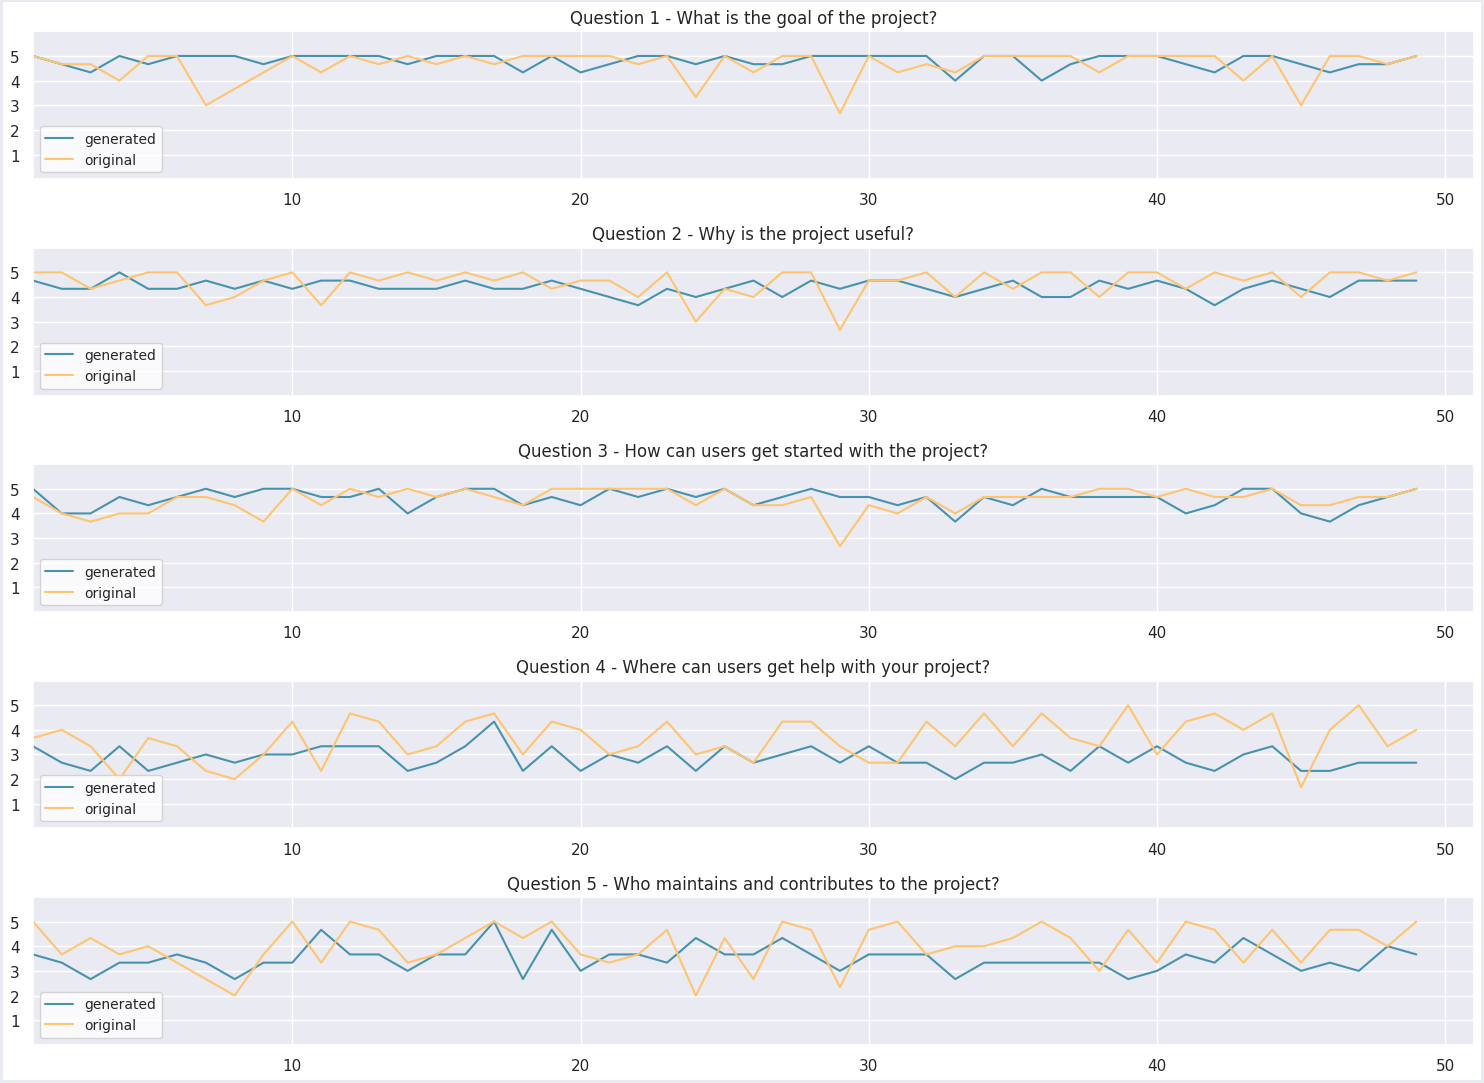

In [68]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15, 11)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame

    # generated
    q1_g = df_llama_mod_tmp2['score_q1_g_1']
    q2_g = df_llama_mod_tmp2['score_q2_g_2']
    q3_g = df_llama_mod_tmp2['score_q3_g_3']
    q4_g = df_llama_mod_tmp2['score_q4_g_4']
    q5_g = df_llama_mod_tmp2['score_q5_g_5']
    # origignal
    q1_o = df_llama_mod_tmp2['score_q1_o_1']
    q2_o = df_llama_mod_tmp2['score_q2_o_2']
    q3_o = df_llama_mod_tmp2['score_q3_o_3']
    q4_o = df_llama_mod_tmp2['score_q4_o_4']
    q5_o = df_llama_mod_tmp2['score_q5_o_5']

    ax[0].plot(q1_g, label='generated', color='#4793AF')
    ax[0].plot(q1_o, label='original', color='#FFC470')
    ax[0].set_title('Question 1 - What is the goal of the project?')
    ax[0].legend(loc=3, fontsize=10, facecolor='white')
    ax[0].set_xlim(1,51)
    ax[0].set_yticks([1, 2, 3, 4, 5])
    ax[0].set_ylim(0,6)
    ax[0].grid(True) 

    ax[1].plot(q2_g, label='generated', color='#4793AF')
    ax[1].plot(q2_o, label='original', color='#FFC470')
    ax[1].set_title('Question 2 - Why is the project useful?')
    ax[1].legend(loc=3, fontsize=10, facecolor='white')
    ax[1].set_xlim(1,51)
    ax[1].set_yticks([1, 2, 3, 4, 5])
    ax[1].set_ylim(0,6)
    ax[1].grid(True) 

    ax[2].plot(q3_g, label='generated', color='#4793AF')
    ax[2].plot(q3_o, label='original', color='#FFC470')
    ax[2].set_title('Question 3 - How can users get started with the project?')
    ax[2].legend(loc=3, fontsize=10, facecolor='white')
    ax[2].set_xlim(1,51)
    ax[2].set_yticks([1, 2, 3, 4, 5])
    ax[2].set_ylim(0,6)
    ax[2].grid(True) 

    ax[3].plot(q4_g, label='generated', color='#4793AF')
    ax[3].plot(q4_o, label='original', color='#FFC470')
    ax[3].set_title('Question 4 - Where can users get help with your project?')
    ax[3].legend(loc=3, fontsize=10, facecolor='white')
    ax[3].set_xlim(1,51)
    ax[3].set_yticks([1, 2, 3, 4, 5])
    ax[3].set_ylim(0,6)
    ax[3].grid(True) 

    ax[4].plot(q5_g, label='generated', color='#4793AF')
    ax[4].plot(q5_o, label='original', color='#FFC470')
    ax[4].set_title('Question 5 - Who maintains and contributes to the project?')
    ax[4].legend(loc=3, fontsize=10, facecolor='white')
    ax[4].set_xlim(1,51)
    ax[4].set_yticks([1, 2, 3, 4, 5])
    ax[4].set_ylim(0,6)
    ax[4].grid(True) 

    # plt.grid(visible=True)
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

In [69]:
df_llama_mod_tmp2.describe()

,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.800000,4.386667,4.613333,2.860000,3.500000,4.620000,4.580000,4.526667,3.640000,4.033333
std,0.277664,0.288557,0.371062,0.442063,0.518370,0.594800,0.546313,0.508834,0.837987,0.830949
min,4.000000,3.666667,3.666667,2.000000,2.666667,2.666667,2.666667,2.666667,1.666667,2.000000
25%,4.666667,4.333333,4.333333,2.666667,3.333333,4.333333,4.333333,4.333333,3.000000,3.416667
50%,5.000000,4.333333,4.666667,2.666667,3.333333,5.000000,4.666667,4.666667,3.666667,4.166667
75%,5.000000,4.666667,5.000000,3.333333,3.666667,5.000000,5.000000,5.000000,4.333333,4.666667
max,5.000000,5.000000,5.000000,4.333333,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [70]:
df_llama_mod_tmp2.to_json('../data/evaluation_results/df_llama_mod_questions.json', orient='records')

In [71]:
df_llama_mod_com.to_json('../data/evaluation_results/df_llama_com_mod.json', orient='records')